Notebook run using:
    
Python version: 3.13.5

CUDA runtime: 12.9

GPU: NVIDIA L4

# Model Building

In this notebook, we will begin building different classification models to predict crash severity

### Load Dataframe

In [2]:
import pandas as pd
import kagglehub

# ✅ Download the dataset if not stored locally
# path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

path ="/home/jacksonwahl/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13"
# ✅ Load the CSV into pandas
df_orig = pd.read_csv(f"{path}/US_Accidents_March23.csv")
print("pandas df loaded")

pandas df loaded


In [3]:
# Make copy of original dataset for working and easy re-initialization
df = df_orig.copy()
print("First 5 records:")
print("shape:", df_orig.shape)
df.head()

First 5 records:
shape: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## Data Preprocessing

See "Model Building" PDF report for rationale on all removed, transformed and imputed data

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Remove columns

In [6]:
df = df.drop(columns=["ID", "Source", "Start_Time", "End_Time", "Start_Lat","Start_Lng","End_Lat", "End_Lng", "Description", "Street", "City", "County","State","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Wind_Direction"])

### Transform columns

#### Weather_Condition

In [7]:
from collections import Counter

# Drop N/A vals
weather_vals = df["Weather_Condition"].dropna().unique()

# Split each weather description (string) into words and flatten the list
all_words = [word for text in weather_vals for word in text.split()]
word_counts = Counter(all_words)

# Visualize the most popular words
print(word_counts)

Counter({'/': 50, 'Windy': 45, 'Light': 31, 'Snow': 31, 'Rain': 26, 'Heavy': 23, 'and': 18, 'Thunder': 14, 'Sleet': 13, 'Fog': 11, 'Freezing': 10, 'Drizzle': 9, 'Blowing': 8, 'Dust': 8, 'Shower': 8, 'Thunderstorms': 7, 'Cloudy': 6, 'Showers': 6, 'Sand': 6, 'Hail': 6, 'with': 4, 'T-Storm': 4, 'Wintry': 4, 'Mix': 4, 'Haze': 3, 'Smoke': 3, 'Drifting': 3, 'Ice': 3, 'Pellets': 3, 'Mostly': 2, 'Partly': 2, 'Shallow': 2, 'Mist': 2, 'Patches': 2, 'of': 2, 'Fair': 2, 'Widespread': 2, 'in': 2, 'the': 2, 'Vicinity': 2, 'Thunderstorm': 2, 'Squalls': 2, 'Grains': 2, 'Small': 2, 'Whirlwinds': 2, 'Whirls': 2, 'Nearby': 2, 'Partial': 2, 'Overcast': 1, 'Scattered': 1, 'Clouds': 1, 'Clear': 1, 'Volcanic': 1, 'Ash': 1, 'Funnel': 1, 'Cloud': 1, 'Low': 1, 'N/A': 1, 'Precipitation': 1, 'Tornado': 1, 'Duststorm': 1})


In [8]:
df.dropna(subset=["Weather_Condition"], inplace=True)

# Ignore 'Windy' because it is captured in the 'wind speed' column
# Ignore 'Rain' because it is captured in the 'precipitation' column
# Ignore 'Freezing' because it is captured by 'temperature' column


# Encode 'Light' and 'Heavy' because they can indicate severity of weather conditions
# Binary column: 1 if 'hello' exists in 'text', 0 otherwise
df["Light_Weather"] = df["Weather_Condition"].str.contains("Light").astype(int)
df["Heavy_Weather"] = df["Weather_Condition"].str.contains("Heavy").astype(int)

# Encode 'Thunder', 'T-Storm' and 'Thunderstorms' 'Thunderstorm' to be 'Thundering'
df["Thundering_Weather"] = df["Weather_Condition"].str.contains("|".join(["Thunder","T-Storm","Thunderstorms","Thunderstorm"])).astype(int)

# Encode 'Fog' because its popular (even though it might be correlated with visibility)
df["Fog_Weather"] = df["Weather_Condition"].str.contains("Fog").astype(int)

# Encode 'Clouds', 'Cloudy', 'Cloud', and 'Overcast' to 'Cloudy'
df["Cloudy_Weather"] = df["Weather_Condition"].str.contains("|".join(["Clouds","Cloudy","Cloud","Overcast"])).astype(int)

# Encode 'Clear' because it seems distinct
df["Clear_Weather"] = df["Weather_Condition"].str.contains("Clear").astype(int)

# Now, drop weather condition since it is no longer needed
df = df.drop(columns=["Weather_Condition"])

In [9]:
df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Light_Weather,Heavy_Weather,Thundering_Weather,Fog_Weather,Cloudy_Weather,Clear_Weather
0,3,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02,False,...,Night,Night,Night,Night,1,0,0,0,0,0
1,2,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00,False,...,Night,Night,Night,Day,1,0,0,0,0,0
2,2,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN,False,...,Night,Night,Day,Day,0,0,0,0,1,0
3,3,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN,False,...,Night,Day,Day,Day,0,0,0,0,1,0
4,2,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN,False,...,Day,Day,Day,Day,0,0,0,0,1,0


#### Binary encoding Sunset and Twilight columns 

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sunrise_Sunset"] = le.fit_transform(df["Sunrise_Sunset"])
df["Civil_Twilight"] = le.fit_transform(df["Civil_Twilight"])
df["Nautical_Twilight"] = le.fit_transform(df["Nautical_Twilight"])
df["Astronomical_Twilight"] = le.fit_transform(df["Astronomical_Twilight"])

### Drop rows with NA values

In [11]:
df.dropna(subset=["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)"], inplace=True)

### Impute columns

In [12]:
# Fill NA columns with zero
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].fillna(df["Visibility(mi)"].mean())
df["Precipitation(in)"] = df["Precipitation(in)"].fillna(df["Precipitation(in)"].mean())

# Fill NA wind chill column with temperature value for that sample
df["Wind_Chill(F)"] = df["Wind_Chill(F)"].fillna(df["Temperature(F)"])


In [13]:
# Confirm no more missing values
na_counts = df.isna().sum()
print(na_counts)

Severity                 0
Distance(mi)             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Precipitation(in)        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Light_Weather            0
Heavy_Weather            0
Thundering_Weather       0
Fog_Weather              0
Cloudy_Weather           0
Clear_Weather            0
dtype: int64


In [14]:
df.shape

(7492013, 32)

### Outlier cleaning

In [15]:
## TODO

### Need to:
### 1) Visualize
### 2) Identify
### 3) Remove outliers

### This is IMPROTANT for tree based classifiers and k-nearest neighboy classifiers

## PCA

95% of explained variance using 25 principle components


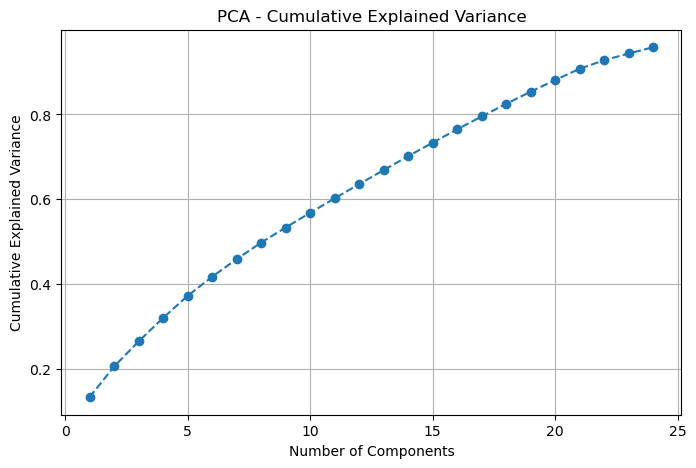

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop target column
X = df.drop(columns=["Severity"])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to n components (e.g., 2 for visualization)
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X_scaled)

cumulative_var = pca.explained_variance_ratio_.cumsum()
print("95% of explained variance using", len(cumulative_var)+1, "principle components")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Model training

### Prepare the data

In [17]:
from sklearn.model_selection import train_test_split


# Create our target and feature cols split
y = df["Severity"]
X = df.drop(columns=["Severity"])

# We'll do an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### OPTIONAL: Perform SMOTE synthetic sampling to balance class distribution in train set

In [18]:
###
#### SMOTE synthetic sampling to balance class distribution
###
from imblearn.over_sampling import SMOTE

# Find majority class count
majority_count = y_train.value_counts().max()

# Define desired counts using percentages
sampling_strategy = {
    1: int(.2 * majority_count),
    4: int(.2 * majority_count)
}
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
percent = y_train.value_counts(normalize=True) * 100
print("\nPercentage of total:\n", percent)

print(y_train_res.value_counts())
percent = y_train_res.value_counts(normalize=True) * 100
print("\nPercentage of total:\n", percent)

# IF USING SMOTE synthetic sampling, set X_train and y_train to be SMOTE results
X_train = X_train_res
y_train = y_train_res

Severity
2    4777387
3    1007455
4     156129
1      52639
Name: count, dtype: int64

Percentage of total:
 Severity
2    79.708006
3    16.808818
4     2.604924
1     0.878252
Name: proportion, dtype: float64
Severity
2    4777387
3    1007455
1     955477
4     955477
Name: count, dtype: int64

Percentage of total:
 Severity
2    62.077880
3    13.090979
1    12.415571
4    12.415571
Name: proportion, dtype: float64


### Random forest classifier

#### Using NVIDIA L4 GPU

In [ ]:
import cudf
import itertools
from tqdm import tqdm
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Convert pandas to cuDF
X_train_gpu = cudf.DataFrame.from_pandas(X_train)
y_train_gpu = cudf.Series(y_train)
X_test_gpu = cudf.DataFrame.from_pandas(X_test)
y_test_gpu = cudf.Series(y_test)

# Create and train GPU Random Forest
print("Training Random forest classifier on NVIDIA GPU")

# Define the model
rf_gpu = cuRF()

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 50],
    "max_features": [0.5, 0.8, 1.0]
}
# Generate all combinations
param_combinations = list(itertools.product(
    param_grid["n_estimators"],
    param_grid["max_depth"],
    param_grid["max_features"]
))

best_acc = 0
best_params = None
best_rf= None

for n_estimators, max_depth, max_features in tqdm(param_combinations, desc="GPU Grid Search"):
    rf = cuRF(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )
    rf.fit(X_train_gpu, y_train_gpu)
    
    

    y_train_pred_gpu = rf.predict(X_train_gpu)
    y_pred_gpu = rf.predict(X_test_gpu)
    
    train_acc = accuracy_score(y_train_gpu.to_pandas(), y_train_pred_gpu.to_pandas())
    test_acc = accuracy_score(y_test_gpu.to_pandas(), y_pred_gpu.to_pandas())
    
    # Summarize this hyperparam performance
    print("n_estimators:", n_estimators, "; max_depth:", max_depth, "; max_features:", max_features, "; Training Accuracy:", train_acc, "; Test Accuracy:", test_acc)
    
    # Convert to CPU for sklearn metrics
    if test_acc > best_acc:
        best_acc = test_acc
        best_params = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features
        }
        best_rf = rf

# Predict using the best random forest
y_pred = best_rf.predict(X_test_gpu)

y_pred_cpu = y_pred.to_pandas()
y_test_cpu = y_test_gpu.to_pandas()

print("Best Params:", best_params)
print(classification_report(y_test_cpu, y_pred_cpu))

Training Random forest classifier on NVIDIA GPU


GPU Grid Search:   6%|▌         | 1/18 [00:53<15:12, 53.66s/it]

n_estimators: 50 ; max_depth: 10 ; max_features: 0.5 ; Training Accuracy: 0.6836624827373283 ; Test Accuracy: 0.7771447334261877


GPU Grid Search:  11%|█         | 2/18 [01:33<12:06, 45.41s/it]

n_estimators: 50 ; max_depth: 10 ; max_features: 0.8 ; Training Accuracy: 0.6888896223340639 ; Test Accuracy: 0.774442523139636


GPU Grid Search:  17%|█▋        | 3/18 [02:17<11:15, 45.03s/it]

n_estimators: 50 ; max_depth: 10 ; max_features: 1.0 ; Training Accuracy: 0.7016832306885473 ; Test Accuracy: 0.7567316669814462


GPU Grid Search:  22%|██▏       | 4/18 [04:26<18:15, 78.22s/it]

n_estimators: 50 ; max_depth: 50 ; max_features: 0.5 ; Training Accuracy: 0.964548046751759 ; Test Accuracy: 0.788451437964286


GPU Grid Search:  28%|██▊       | 5/18 [07:23<24:36, 113.58s/it]

n_estimators: 50 ; max_depth: 50 ; max_features: 0.8 ; Training Accuracy: 0.9739583793541305 ; Test Accuracy: 0.7875684979274601


GPU Grid Search:  33%|███▎      | 6/18 [10:36<28:08, 140.70s/it]

n_estimators: 50 ; max_depth: 50 ; max_features: 1.0 ; Training Accuracy: 0.9708388839828914 ; Test Accuracy: 0.7819184825444156


GPU Grid Search:  39%|███▉      | 7/18 [11:31<20:39, 112.70s/it]

n_estimators: 100 ; max_depth: 10 ; max_features: 0.5 ; Training Accuracy: 0.6821104665456309 ; Test Accuracy: 0.7762844842141934


GPU Grid Search:  44%|████▍     | 8/18 [12:50<17:00, 102.02s/it]

n_estimators: 100 ; max_depth: 10 ; max_features: 0.8 ; Training Accuracy: 0.6883796036173516 ; Test Accuracy: 0.7746674292563482


GPU Grid Search:  50%|█████     | 9/18 [14:18<14:38, 97.59s/it] 

n_estimators: 100 ; max_depth: 10 ; max_features: 1.0 ; Training Accuracy: 0.7016654287613653 ; Test Accuracy: 0.7566255540064989


GPU Grid Search:  56%|█████▌    | 10/18 [18:33<19:28, 146.12s/it]

n_estimators: 100 ; max_depth: 50 ; max_features: 0.5 ; Training Accuracy: 0.96548739077803 ; Test Accuracy: 0.7892369409297766
